In [1]:
# Importing the libraries Panda and numpy
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#Import CSV file , Keep the csv file same place as the jupyter file
data= pd.read_csv('foodhub_order.csv')

In [3]:
# Question 1: 
#Understanding the structure of the data
#Overview of the dataset shape, datatypes - Statistical summary and check for missing values - 
#Answer all the key questions asked in this section

In [4]:
#checking the data head and tail to visualize the data
data.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [5]:
data.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.450,Weekend,Not given,28,24


In [6]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")
# compare it with above head and tail output to see if it is corect 

There are 1898 rows and 9 columns.


In [7]:
data_frame1 = pd.DataFrame(data)
#print(data_frame1)
print("Shape of the data frame:")
print(data_frame1.shape)

Shape of the data frame:
(1898, 9)


In [8]:
#dataset shape
store1=data.shape
print("The number of rows are",store1 [0]," and number of Columns are",store1 [1])
# Sanity check - compare it with above head and tail output to see if it is corect 

The number of rows are 1898  and number of Columns are 9


In [9]:
#To find datatypes of each column
#datatypes - Statistical summary
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [10]:
# There are 9 columns and 1898 entries , 
#data type 4 are Int data type, 4 are object and 1 is float

In [11]:
#from looking at data we can see that rating should be Int or Float type but it is object type 
# lets look at the rating column for unique data 
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [12]:
# replacing values not known value with nan
data['rating'] = data['rating'].replace(['Not given'],np.nan)

# changing the data type of rating to float
data['rating'] = data['rating'].astype(float)

In [13]:
#checking again the data set
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [14]:

data['rating'].unique()

array([nan,  5.,  3.,  4.])

In [15]:
#data type now are 4 are Int data type, 3 are object and 2 is float


In [16]:
#to see how many are null data
data.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [17]:
#to see if there is any duplicate
data.duplicated().sum()

0

In [18]:
# Stastical Summary of data
data.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000,1898.000,1898.000,1162.000,1898.000,1898.000
mean,1477495.500,171168.478,16.499,4.344,27.372,24.162
std,548.050,113698.140,7.484,0.741,4.632,4.973
min,1476547.000,1311.000,4.470,3.000,20.000,15.000
25%,1477021.250,77787.750,12.080,4.000,23.000,20.000
50%,1477495.500,128600.000,14.140,5.000,27.000,25.000
75%,1477969.750,270525.000,22.297,5.000,31.000,28.000
max,1478444.000,405334.000,35.410,5.000,35.000,33.000


In [19]:
# average Rating is 4.34 food preperation time is 27.37 min and delivary time is 24.16min 


In [20]:
#Univariate Data Analysis
#Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset 

In [21]:
#making a list of number of time a restaurant send order and Food Cusine ordered 
cat_cols =  ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating','customer_id']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------
5.000    588
4.000    386


In [22]:
#Distribution of 'restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating','customer_id' 
#Above show some resturent are most liked by the customers such as 
#-Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken
#Cusine most liked is American,Japanese,Italian ,Chinese 
#Most of the orderes are done in Weekends 
#Most of the customer highly rate the food with 5
# And many customers ordered only once from the app

In [ ]:
#number of the customers order more than once 
np.count_nonzero((data['customer_id'].value_counts()>1))


In [73]:
#number of the customers order more than once 
np.count_nonzero((data['rating'].value_counts()>1))


3

In [76]:
# Counting NaN values in the 'rating' column
rating_nan_count = data['rating'].isna().sum()

print(rating_nan_count)

736


In [24]:
# Printing the count of unique categorical levels in each column in % percentage
for column in cat_cols:
    print(data[column].value_counts(normalize= True))
    print("-" * 50)

Shake Shack                 0.115
The Meatball Shop           0.070
Blue Ribbon Sushi           0.063
Blue Ribbon Fried Chicken   0.051
Parm                        0.036
                             ... 
Sushi Choshi                0.001
Dos Caminos Soho            0.001
La Follia                   0.001
Philippe Chow               0.001
'wichcraft                  0.001
Name: restaurant_name, Length: 178, dtype: float64
--------------------------------------------------
American         0.308
Japanese         0.248
Italian          0.157
Chinese          0.113
Mexican          0.041
Indian           0.038
Middle Eastern   0.026
Mediterranean    0.024
Thai             0.010
French           0.009
Southern         0.009
Korean           0.007
Spanish          0.006
Vietnamese       0.004
Name: cuisine_type, dtype: float64
--------------------------------------------------
Weekend   0.712
Weekday   0.288
Name: day_of_the_week, dtype: float64
----------------------------------------------

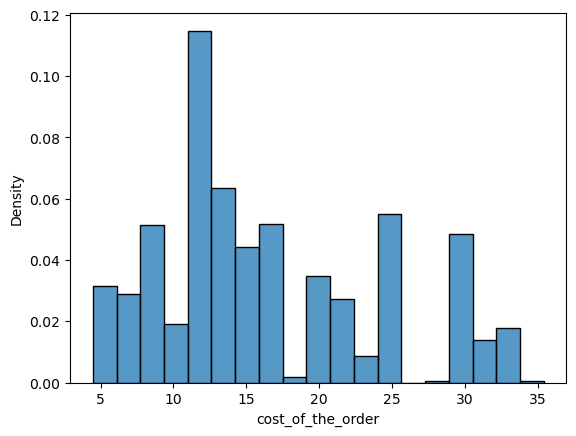

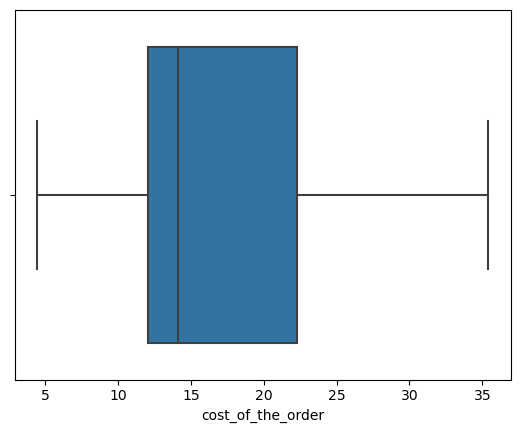

In [25]:
sns.histplot(data=data,x='cost_of_the_order',stat='density')
plt.show()
sns.boxplot(data=data,x='cost_of_the_order')
plt.show()

In [26]:
#data is normal distributed for cost of order , there is no outliers by looking at data distribution 

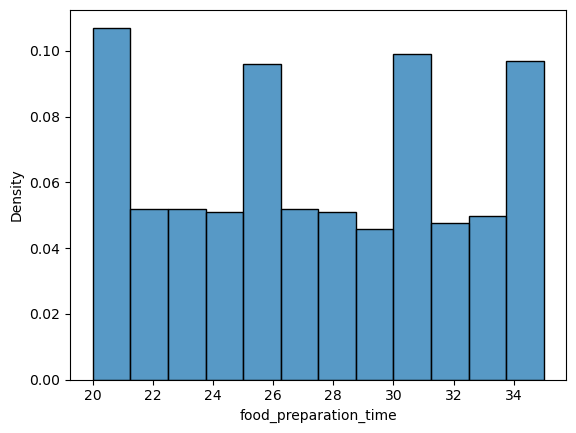

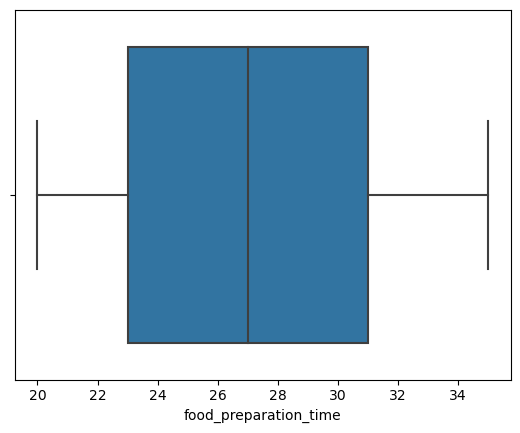

In [27]:
sns.histplot(data=data,x='food_preparation_time',stat='density')
plt.show()
sns.boxplot(data=data,x='food_preparation_time')
plt.show()

In [28]:
#data is  not a normal distributed for food preparation time , there is no outliers by looking at data distribution 

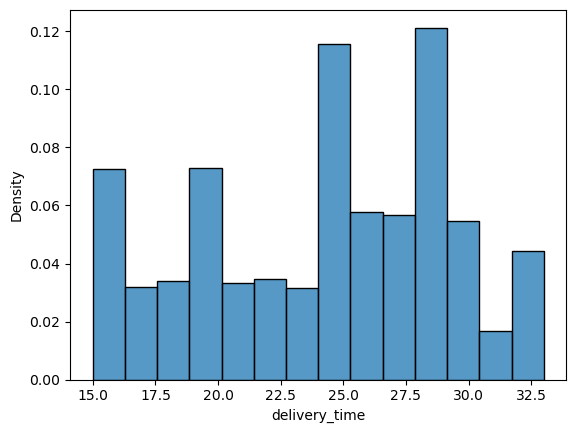

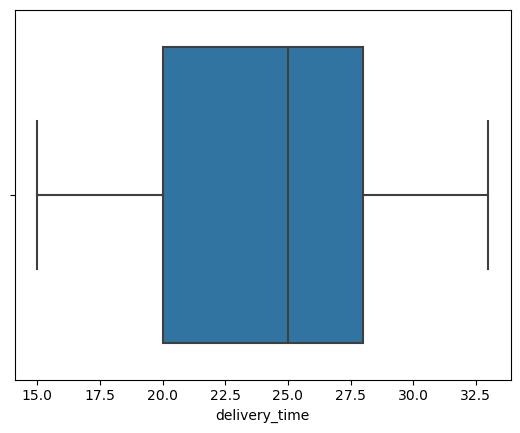

In [29]:
sns.histplot(data=data,x='delivery_time',stat='density')
plt.show()
sns.boxplot(data=data,x='delivery_time')
plt.show()

In [30]:
#data is  not a normal distributed for delivery time , there is no outliers by looking at data distribution 

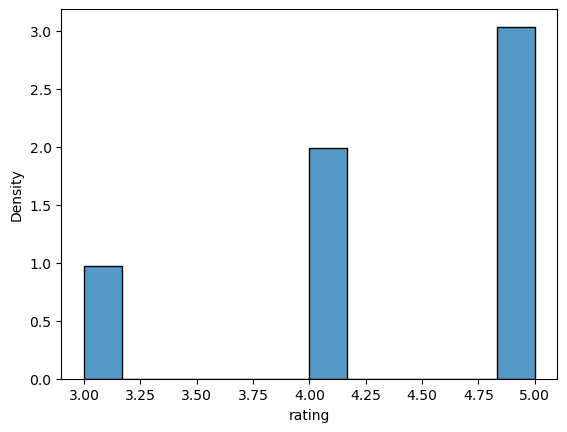

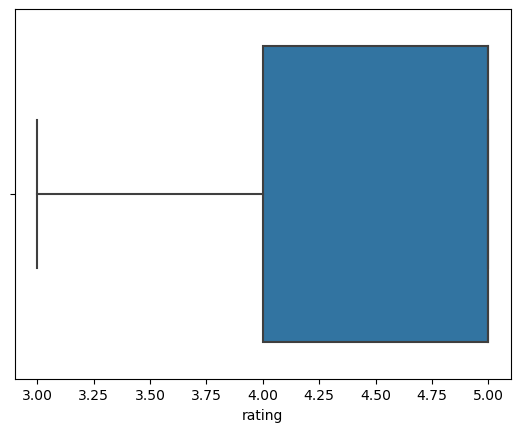

In [31]:
sns.histplot(data=data,x='rating',stat='density')
plt.show()
sns.boxplot(data=data,x='rating')
plt.show()

In [32]:
#data is  not a normal distributed for rating , there is no outliers by looking at data distribution 

In [33]:
#Analysing count plot for all the object type data to see the distribution baisness except 'restaurant_name'

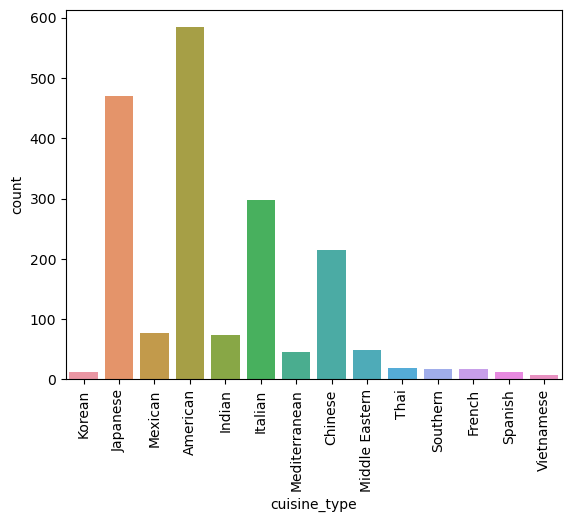

In [34]:
sns.countplot(data=data,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

In [35]:
# More demand for American and Japanese cuisine followed by Italian and chinese food

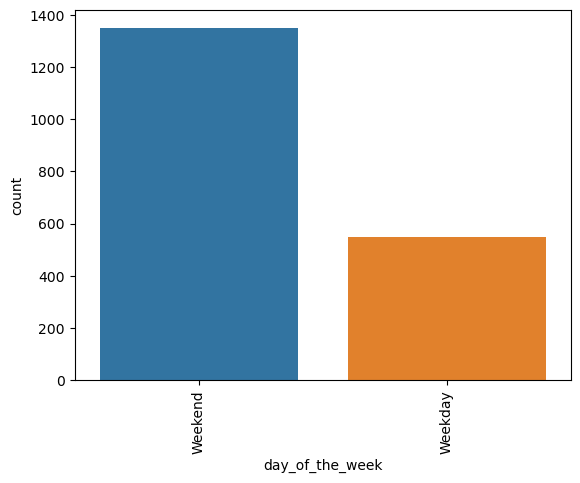

In [36]:
sns.countplot(data=data,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

In [37]:
#order in weekends are more than twice compared to weekdays 

In [38]:
data.loc[data['day_of_the_week']=='Weekend'].describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1351.000,1477500.371,554.168,1476547.000,1477015.500,1477505.000,1477980.500,1478444.000
customer_id,1351.000,170422.561,113403.749,1311.000,77665.000,127934.000,268958.000,405334.000
cost_of_the_order,1351.000,16.575,7.487,4.470,12.080,14.410,22.285,33.370
rating,822.000,4.359,0.731,3.000,4.000,5.000,5.000,5.000
food_preparation_time,1351.000,27.437,4.601,20.000,23.000,27.000,31.000,35.000
delivery_time,1351.000,22.470,4.629,15.000,18.500,22.000,27.000,30.000


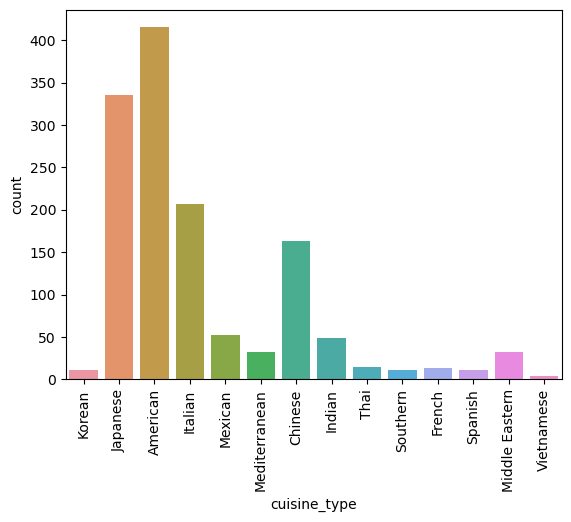

In [39]:
sns.countplot(data=data.loc[data['day_of_the_week']=='Weekend'],x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

In [40]:
data.loc[data['day_of_the_week']=='Weekday'].describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,547.000,1477483.470,532.945,1476559.000,1477043.000,1477457.000,1477929.000,1478435.000
customer_id,547.000,173010.771,114505.333,5693.000,78913.000,130521.000,276192.000,404649.000
cost_of_the_order,547.000,16.311,7.480,4.750,12.080,14.070,22.285,35.410
rating,340.000,4.309,0.765,3.000,4.000,4.000,5.000,5.000
food_preparation_time,547.000,27.212,4.709,20.000,23.000,27.000,31.000,35.000
delivery_time,547.000,28.340,2.891,24.000,26.000,28.000,31.000,33.000


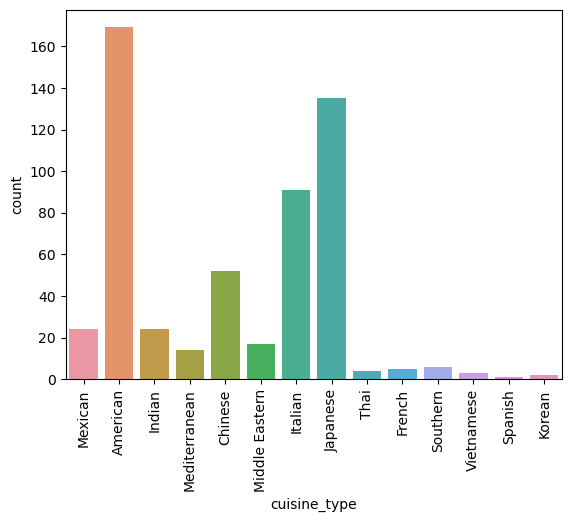

In [41]:
sns.countplot(data=data.loc[data['day_of_the_week']=='Weekday'],x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

In [42]:
#from above analysis in weekend delivary time is longer compared to weekdays 
#other parameter look prety similar for comparing weekend and weekdays

In [43]:
#Multivariate Data Analysis
#- Perform bivariate/multivariate analysis to explore relationships
#between the important variables in the dataset 
#- Answer all the key questions asked in this section

C:\Users\dhruv\AppData\Local\Temp\ipykernel_11368\1204564924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


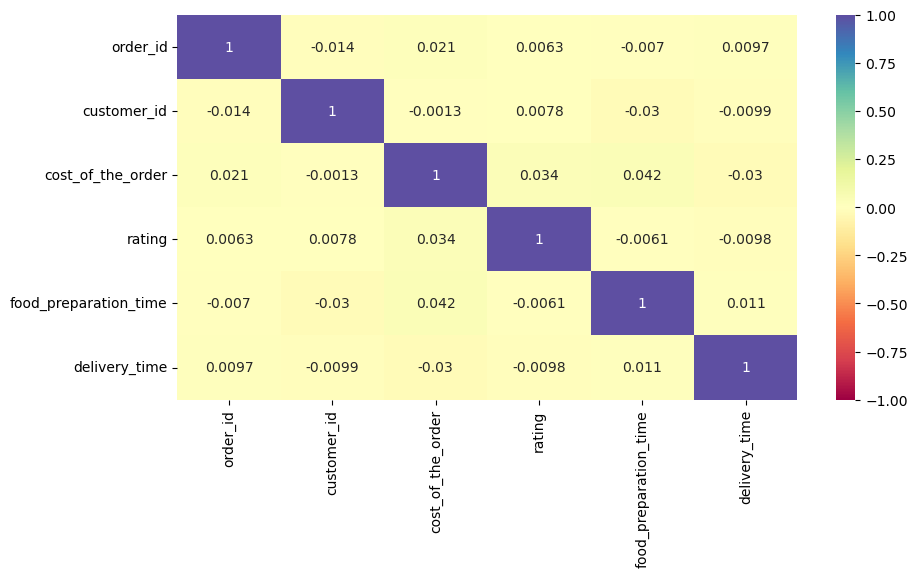

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [45]:
#there is no correlation between the data except some correlation between  cost of order and food preparation time 

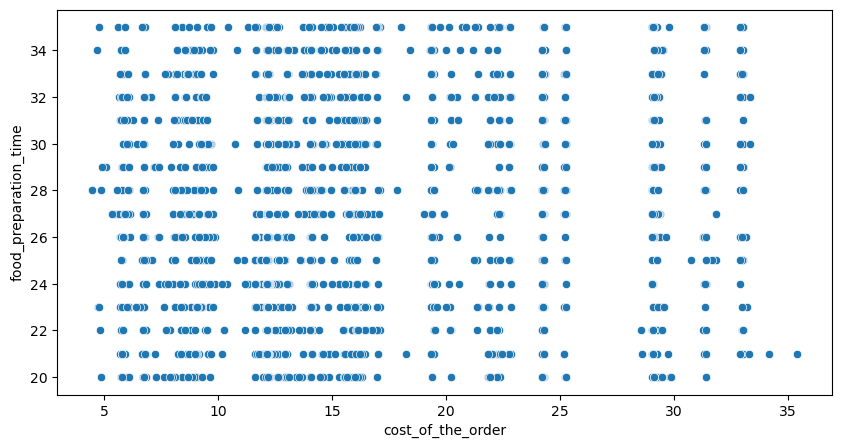

In [67]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='cost_of_the_order',y='food_preparation_time')
plt.show()

In [46]:
#taking only weekday data set and saving in dataweekday
dataweekday=data.loc[data['day_of_the_week']=='Weekday']

In [47]:
#taking only weekend data set and saving in dataweekend
dataweekend=data.loc[data['day_of_the_week']=='Weekend']

C:\Users\dhruv\AppData\Local\Temp\ipykernel_11368\2438519633.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataweekday.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


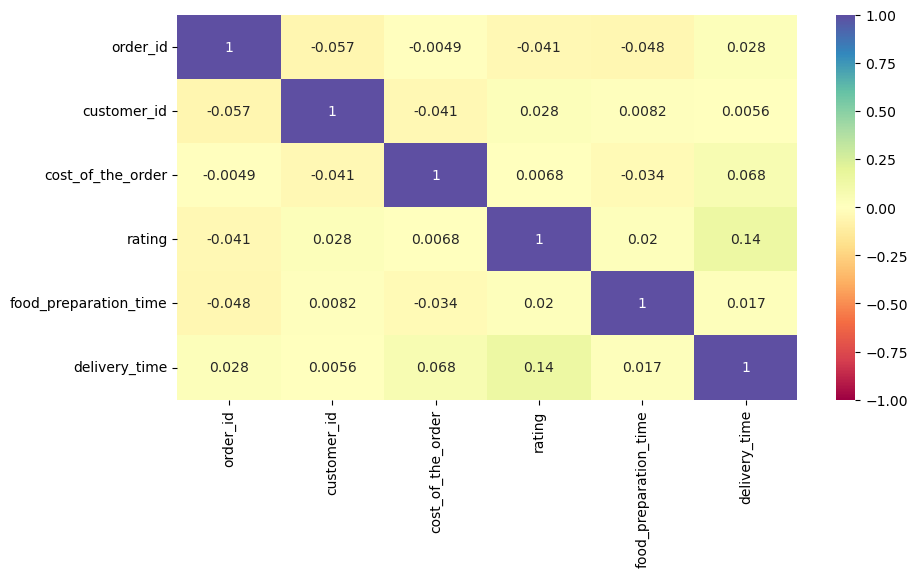

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(dataweekday.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [49]:
#some possitive correlation between rating and delivary time in weekday and cost of order and delivary time 

C:\Users\dhruv\AppData\Local\Temp\ipykernel_11368\580667698.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataweekend.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


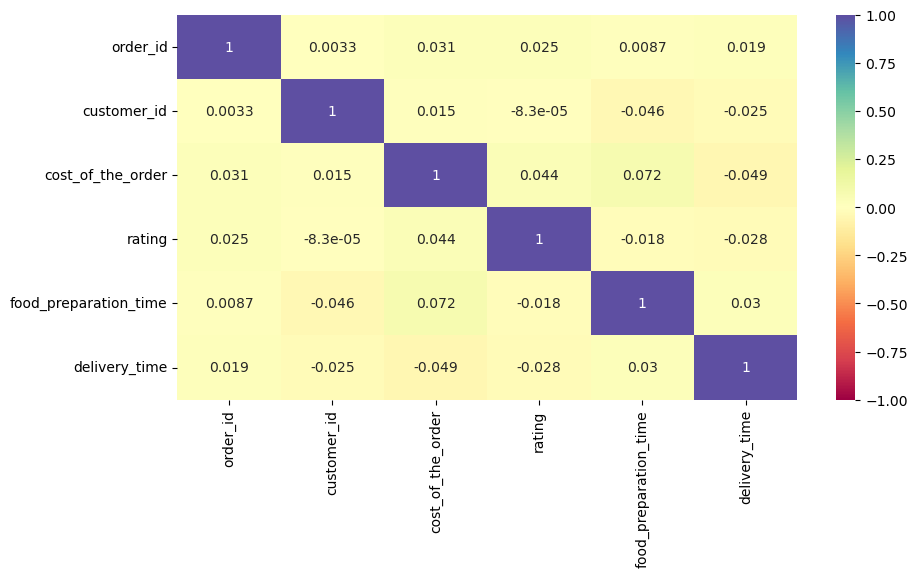

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(dataweekend.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [51]:
#some possitive correlation between food prepration time and cost of order in weekends and  
# also between rating and cost of order


In [68]:
# using pd.cut() function to create bins for cost of food to dvide in low moderate and high 
data['cost_of_the_orderbin'] = pd.cut(data['cost_of_the_order'],bins=[5,15,25,35],labels=['Low','Moderate','High'], right = False)

In [69]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_of_the_orderbin
0,1477147,337525,Hangawi,Korean,30.750,Weekend,NaN,25,20,High
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,NaN,25,23,Low
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5.000,23,28,Low
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15,High
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4.000,25,24,Low


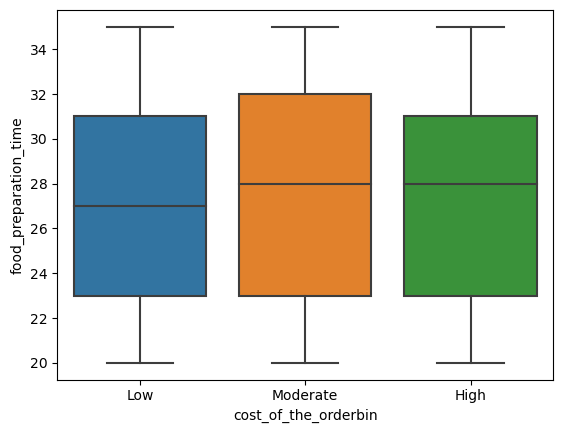

In [70]:
sns.boxplot(data=data,x='cost_of_the_orderbin',y='food_preparation_time')
plt.show()

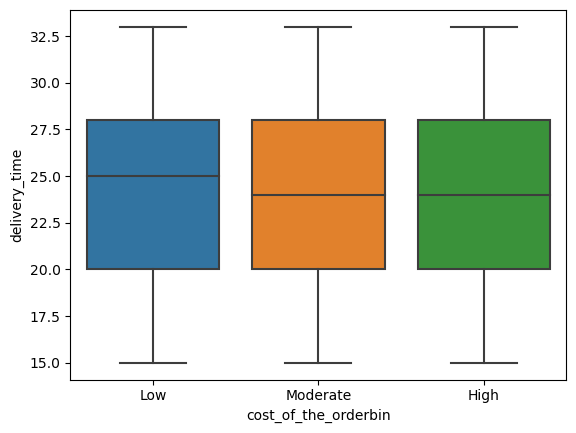

In [71]:
sns.boxplot(data=data,x='cost_of_the_orderbin',y='delivery_time')
plt.show()